<a href="https://colab.research.google.com/github/xrhd/sandbox/blob/main/1_projects/jax_implementations/Linear_Regression_with_Gradient_Descent_using_JAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generated 50 data points with true m=2.5, c=1.0
Initial random parameters: m=-0.0481, c=-0.0740

Starting Gradient Descent for 1000 iterations...
Iteration    0: Loss = 240.5061, m = 1.7342, c = 0.1930
Iteration  100: Loss = 4.6170, m = 2.5365, c = 0.3431
Iteration  200: Loss = 4.6167, m = 2.5338, c = 0.3608
Iteration  300: Loss = 4.6166, m = 2.5322, c = 0.3715
Iteration  400: Loss = 4.6165, m = 2.5312, c = 0.3780
Iteration  500: Loss = 4.6165, m = 2.5307, c = 0.3818
Iteration  600: Loss = 4.6165, m = 2.5303, c = 0.3842
Iteration  700: Loss = 4.6165, m = 2.5301, c = 0.3856
Iteration  800: Loss = 4.6165, m = 2.5300, c = 0.3865
Iteration  900: Loss = 4.6165, m = 2.5299, c = 0.3870
Gradient Descent finished.

Learned Parameters: m = 2.5298, c = 0.3873
Final Loss: 4.6165


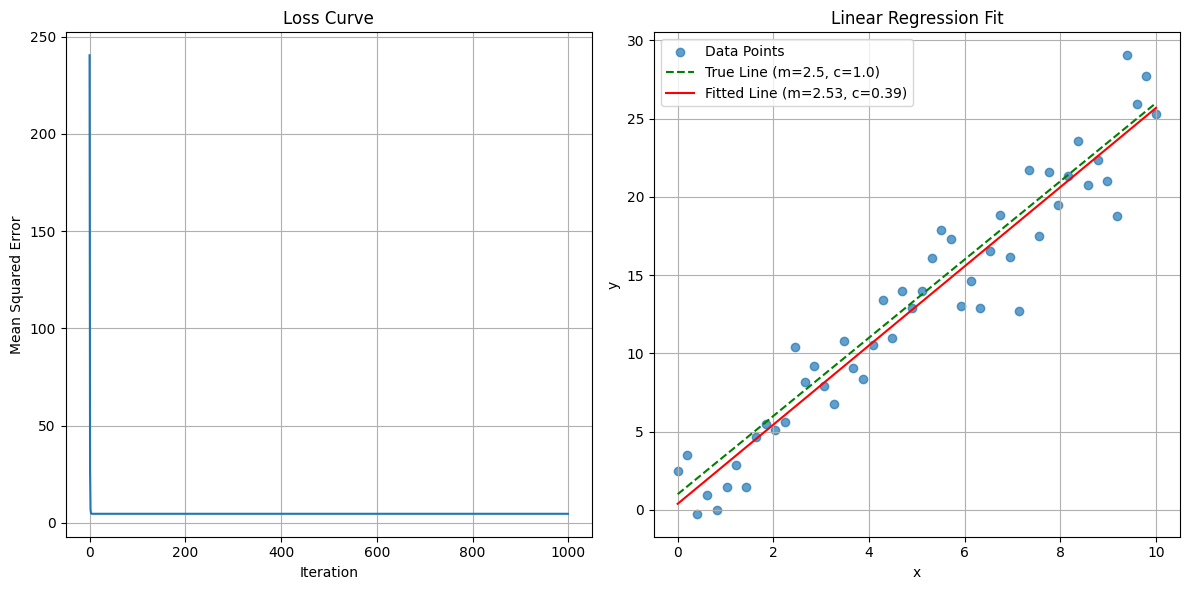

In [1]:
import jax
import jax.numpy as jnp
from jax import random, grad, value_and_grad, jit
import matplotlib.pyplot as plt # For quick verification plot

# --- 1. Configuration & Hyperparameters ---
LEARNING_RATE = 0.01
ITERATIONS = 1000
RANDOM_SEED = 42
N_SAMPLES = 50
NOISE_LEVEL = 2.5

# True parameters (we want the model to learn these)
M_TRUE = 2.5
C_TRUE = 1.0

# JAX random key
key = random.PRNGKey(RANDOM_SEED)
key, data_key, init_key = random.split(key, 3)

# --- 2. Generate Synthetic Data ---
x = jnp.linspace(0, 10, N_SAMPLES)
noise = random.normal(data_key, (N_SAMPLES,)) * NOISE_LEVEL
y_true = M_TRUE * x + C_TRUE + noise

print(f"Generated {N_SAMPLES} data points with true m={M_TRUE}, c={C_TRUE}")

# --- 3. Define Model and Loss Function ---

# Simple linear model prediction function
def predict(params, x_input):
  """Predicts y based on linear model y = mx + c."""
  m, c = params
  return m * x_input + c

# Mean Squared Error Loss function
def mse_loss(params, x_input, y_actual):
  """Calculates the Mean Squared Error loss."""
  y_pred = predict(params, x_input)
  error = y_pred - y_actual
  return jnp.mean(error**2)

# --- 4. Gradient Calculation Setup (using JAX) ---

# Create a function that returns both the loss value and the gradients
# We want gradients with respect to the *first* argument (params)
value_and_gradient_fn = value_and_grad(mse_loss)

# --- 5. Initialize Parameters ---
# Initialize parameters (m, c) randomly
# Splitting the key again for distinct initialization values if needed
init_key_m, init_key_c = random.split(init_key)
# Start with random guesses, maybe around 0
m_init = random.normal(init_key_m, ()) * 0.1 # Use () for scalar shape
c_init = random.normal(init_key_c, ()) * 0.1
params = (m_init, c_init) # Store parameters as a tuple

print(f"Initial random parameters: m={params[0]:.4f}, c={params[1]:.4f}")

# --- 6. Gradient Descent Training Loop ---

# Store history for later visualization
loss_history = []
m_history = []
c_history = []

# Optimize the update step using JIT (Just-In-Time compilation)
@jit
def update_step(params, x_input, y_actual, learning_rate):
  """Performs one step of gradient descent."""
  loss_val, grads = value_and_gradient_fn(params, x_input, y_actual)
  m, c = params
  grad_m, grad_c = grads # JAX matches gradient structure to params structure

  # Gradient descent update rule
  new_m = m - learning_rate * grad_m
  new_c = c - learning_rate * grad_c

  return (new_m, new_c), loss_val

print(f"\nStarting Gradient Descent for {ITERATIONS} iterations...")
# Training loop
for i in range(ITERATIONS):
  # Store current parameter values *before* the update for history
  m_history.append(params[0])
  c_history.append(params[1])

  # Perform one update step
  params, loss_val = update_step(params, x, y_true, LEARNING_RATE)

  # Store the loss *from this iteration*
  loss_history.append(loss_val)

  # Print progress occasionally
  if i % 100 == 0:
    print(f"Iteration {i:4d}: Loss = {loss_val:.4f}, m = {params[0]:.4f}, c = {params[1]:.4f}")

# Add the final parameters to history
m_history.append(params[0])
c_history.append(params[1])

print("Gradient Descent finished.")
print(f"\nLearned Parameters: m = {params[0]:.4f}, c = {params[1]:.4f}")
print(f"Final Loss: {loss_history[-1]:.4f}")

# --- 7. Quick Verification Plot (using Matplotlib) ---
# (This is just for checking; your main visualizations will use this data)

plt.figure(figsize=(12, 6))

# Plot Loss History
plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.title("Loss Curve")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.grid(True)

# Plot Data and Fitted Line
plt.subplot(1, 2, 2)
plt.scatter(x, y_true, label='Data Points', alpha=0.7)
plt.plot(x, M_TRUE * x + C_TRUE, color='green', linestyle='--', label=f'True Line (m={M_TRUE}, c={C_TRUE})')
plt.plot(x, predict(params, x), color='red', label=f'Fitted Line (m={params[0]:.2f}, c={params[1]:.2f})')
plt.title("Linear Regression Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [4]:

# --- Data for Visualization ---
# You would now use these lists/arrays in your Manim/Matplotlib scripts:
# - x: The input data points
# - y_true: The target data points
# - loss_history: List of loss values per iteration
# - m_history: List of 'm' values per iteration
# - c_history: List of 'c' values per iteration
#
# Example: You can save this data to use in another script
jnp.savez('gradient_descent_history.npz',
          x=x, y_true=y_true,
          loss=jnp.array(loss_history),
          m=jnp.array(m_history),
          c=jnp.array(c_history))
#
# In your Manim/Matplotlib script, you would load it:
# data = jnp.load('gradient_descent_history.npz')
# x = data['x']
# loss_history = data['loss']
# etc.